In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Carga de datos
df = pd.read_json("../ataques_limpios.json")


In [7]:
# 2. Selección de variables numéricas para clustering
df = df.sample(n=5000, random_state=1)  # toma 5000 filas aleatorias

# Seleccionar solo columnas numéricas pequeñas
feature_cols = ["port", "protocol", "os", "country"]  # evitar timestamp grande
X = df[feature_cols]

# Escalado
# Convertir variables categóricas a numéricas antes de escalar
X = pd.get_dummies(X, columns=["protocol", "os", "country"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensionalidad (opcional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


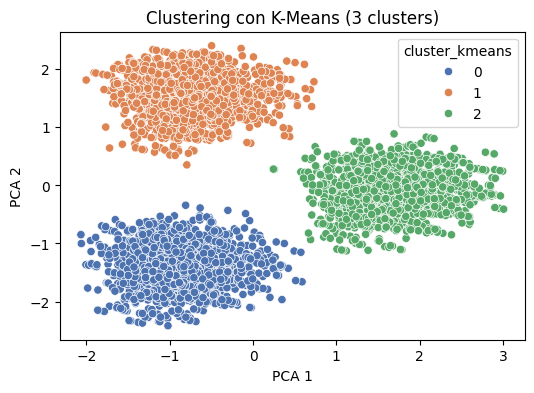

In [8]:
# ---------------K-Means rápido
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1, max_iter=200)
clusters = kmeans.fit_predict(X_pca)
df["cluster_kmeans"] = clusters

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster_kmeans"], palette="deep")
plt.title("Clustering con K-Means (3 clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


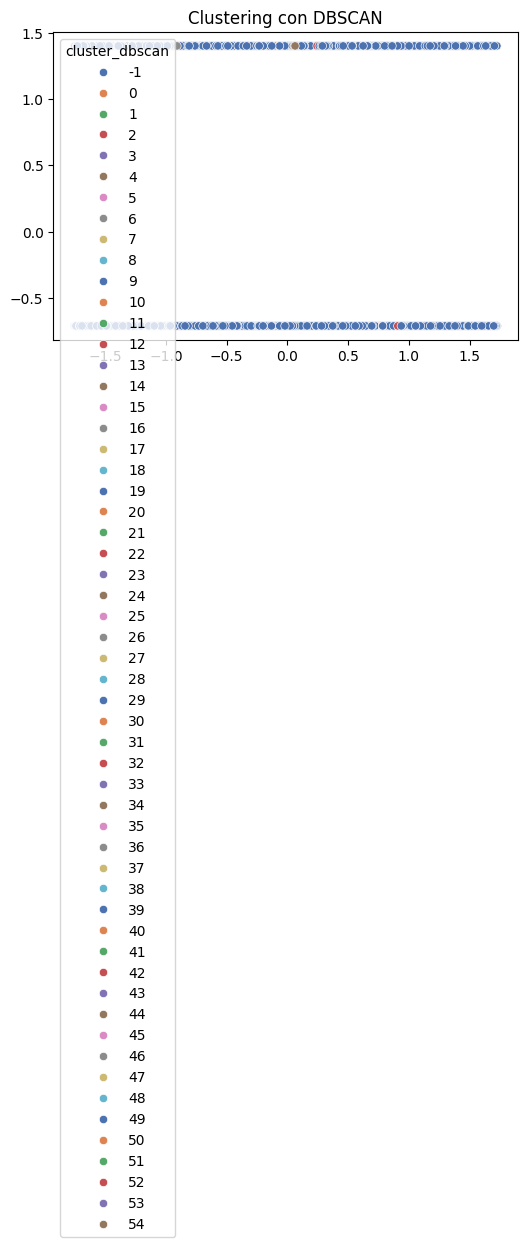

In [9]:
# ------------------- DBSCAN -------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["cluster_dbscan"] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df["cluster_dbscan"], palette="deep")
plt.title("Clustering con DBSCAN")
plt.savefig("dbscan.png")
plt.show()

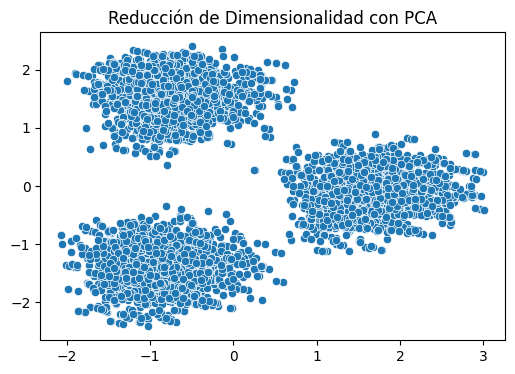

In [10]:
# ------------------- PCA -------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.title("Reducción de Dimensionalidad con PCA")
plt.savefig("pca.png")
plt.show()